# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Shafira Alayna Fathih
- **Email:** shafirafathih@gmail.com
- **ID Dicoding:** shafiraalayna

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan pola peminjaman sepeda setiap bulannya dalam jangka waktu 2 tahun?
- Bagaimana dampak cuaca terhadap peminjaman sepeda dalam jangka waktu 2 tahun?


## Import Semua Packages/Library yang Digunakan

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
day_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [66]:
hour_df = pd.read_csv("/content/drive/MyDrive/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel **day_df**

In [67]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [68]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [69]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [70]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel **hour_df**

In [71]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [72]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [73]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [74]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


###Cleaning Data

######Replace Column Values

In [75]:
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
             5: 'May', 6: 'June', 7: 'July', 8: 'August',
             9: 'September', 10: 'October', 11: 'November', 12: 'December'}

day_df['mnth'].replace(month_map, inplace = True)

weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

day_df['weekday'].replace(weekday_map, inplace = True)

holiday_map = {0: False, 1: True}
day_df['holiday'].replace(holiday_map, inplace = True)

day_df['workingday'].replace(holiday_map, inplace = True)

weathersit_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
day_df['weathersit'].replace(weathersit_map, inplace = True)

season_map = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}
day_df['season'].replace(season_map, inplace = True)

year_map = {0: '2011', 1: '2012'}
day_df['yr'].replace(year_map, inplace = True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,False,Saturday,False,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,False,Sunday,False,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,False,Monday,True,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,False,Tuesday,True,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,False,Wednesday,True,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


######Replace Column Name

In [76]:
column_map = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'cnt': 'count'}
day_df.rename(columns = column_map, inplace = True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,January,False,Saturday,False,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,False,Sunday,False,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,False,Monday,True,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,False,Tuesday,True,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,False,Wednesday,True,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Ketika saya melakukan assessing data, tidak ditemukan duplikasi dan missing values pada dataframe day_df maupun dataframe hour_df

######Change Data Type

In [77]:
day_df['date'] = pd.to_datetime(day_df['date'])
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    object        
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: bool(2), datetime64[ns]

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,January,False,Saturday,False,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,False,Sunday,False,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,False,Monday,True,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,False,Tuesday,True,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,False,Wednesday,True,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore *day_df*

In [78]:
day_df.sample(5)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
622,623,2012-09-14,fall,2012,September,False,Friday,True,Clear,0.633333,0.594083,0.672500,0.103863,1379,6630,8009
646,647,2012-10-08,winter,2012,October,True,Monday,False,Mist,0.383333,0.387608,0.709583,0.189679,874,4604,5478
201,202,2011-07-21,fall,2011,July,False,Thursday,True,Mist,0.815000,0.826371,0.691250,0.222021,632,3152,3784
319,320,2011-11-16,winter,2011,November,False,Wednesday,True,Light Snow,0.456667,0.451988,0.930000,0.136829,145,1672,1817
420,421,2012-02-25,springer,2012,February,False,Saturday,False,Clear,0.290833,0.255675,0.395833,0.421642,317,2415,2732


In [79]:
day_df.describe(include='all')

<ipython-input-79-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,2012,January,False,Saturday,True,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


######Pertanyaan 1

In [80]:
day_df_c = day_df.copy()

In [81]:
day_2011 = day_df_c[day_df_c['year']=='2011']
day_2011[['month', 'count']].groupby(by= 'month')['count'].sum().sort_values(ascending = False)

month
June         143512
July         141341
August       136691
May          135821
September    127418
October      123511
November     102167
April         94870
December      87323
March         64045
February      48215
January       38189
Name: count, dtype: int64

In [82]:
day_2012 = day_df_c[day_df_c['year']=='2012']
day_2012[['month', 'count']].groupby(by= 'month')['count'].sum().sort_values(ascending = False)

month
September    218573
August       214503
July         203607
June         202830
October      198841
May          195865
April        174224
March        164875
November     152664
December     123713
February     103137
January       96744
Name: count, dtype: int64

Pada tahun 2011 peminjam paling banyak di bulan Juni, Juli, Agustus, dan Mei.
Sedangkan peminjam paling sedikit di bulan Januari, Februari, Maret dan Desember.

Pada tahun 2012 peminjam paling banyak di bulan September, Agustus, Juli, dan Juni. Sedangkan peminjam paling sedikit di bulan Januari, Februari, December, dan November.

Dari kedua tahun di atas dapat dilihat bahwa peminjam paling banyak terjadi di bulan Juni, Juli, dan Agustus. Sehingga disarankan untuk meningkatkan persediaan sepeda di bulan tersebut dan mengurangi persediaan sepeda di bulan Januari, Februari, dan Desember.

######Pertanyaan 2

In [83]:
day_df_c.groupby(by='weathersit').agg({
    'count': 'sum'
})

,count
weathersit,
Clear,2257952
Light Snow,37869
Mist,996858


Berdasarkan pivot table di atas, dalam jangka waktu 2 tahun peminjaman sepeda paling banyak terjadi pada saat keadaan cuaca cerah dan peminjaman sepeda paling sedikit terjadi ketika cuacanya bersalju ringan. Dan tidak ada yang meminjam sepeda ketika cuacanya sedang hujan deras.

### Explore *hour_df*

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan pola peminjaman sepeda setiap bulannya di dalam 2 tahun?

In [84]:
data_2011 = day_2011[["month", "count"]]
vis_2011 = pd.DataFrame()
list_bulan = []
list_count = []

for month_name in day_2011['month'].unique():
  list_bulan.append(month_name)
  list_count.append(data_2011.loc[data_2011['month'] == month_name, 'count'].sum())

d1 = {"month": list_bulan,
      "count": list_count}

kolom_bulan = pd.Series(list_bulan)
kolom_jumlah = pd.Series(list_count)
vis_2011 = pd.concat([kolom_bulan, kolom_jumlah], axis=1, ignore_index=True)
vis_2011.rename(columns={0: 'month', 1: 'count'}, inplace=True)
vis_2011

,month,count
0,January,38189
1,February,48215
2,March,64045
3,April,94870
4,May,135821
5,June,143512
6,July,141341
7,August,136691
8,September,127418
9,October,123511


In [85]:
data_2012 = day_2012[["month", "count"]]
vis_2012 = pd.DataFrame()
list_bulan = []
list_count = []

for month_name in day_2012['month'].unique():
  list_bulan.append(month_name)
  list_count.append(data_2012.loc[data_2012['month'] == month_name, 'count'].sum())

d1 = {"month": list_bulan,
      "count": list_count}

kolom_bulan = pd.Series(list_bulan)
kolom_jumlah = pd.Series(list_count)
vis_2012 = pd.concat([kolom_bulan, kolom_jumlah], axis=1, ignore_index=True)
vis_2012.rename(columns={0: 'month', 1: 'count'}, inplace=True)
vis_2012

,month,count
0,January,96744
1,February,103137
2,March,164875
3,April,174224
4,May,195865
5,June,202830
6,July,203607
7,August,214503
8,September,218573
9,October,198841


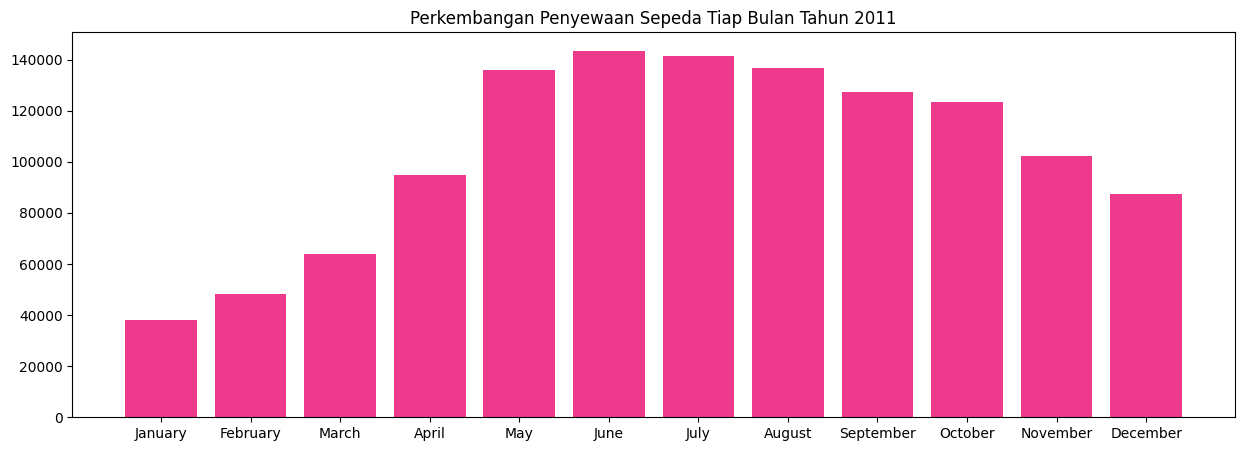

In [86]:
plt.figure(figsize=(15,5))
plt.bar(vis_2011['month'], vis_2011['count'], color="#ee3a8c")
plt.title("Perkembangan Penyewaan Sepeda Tiap Bulan Tahun 2011")
plt.show()

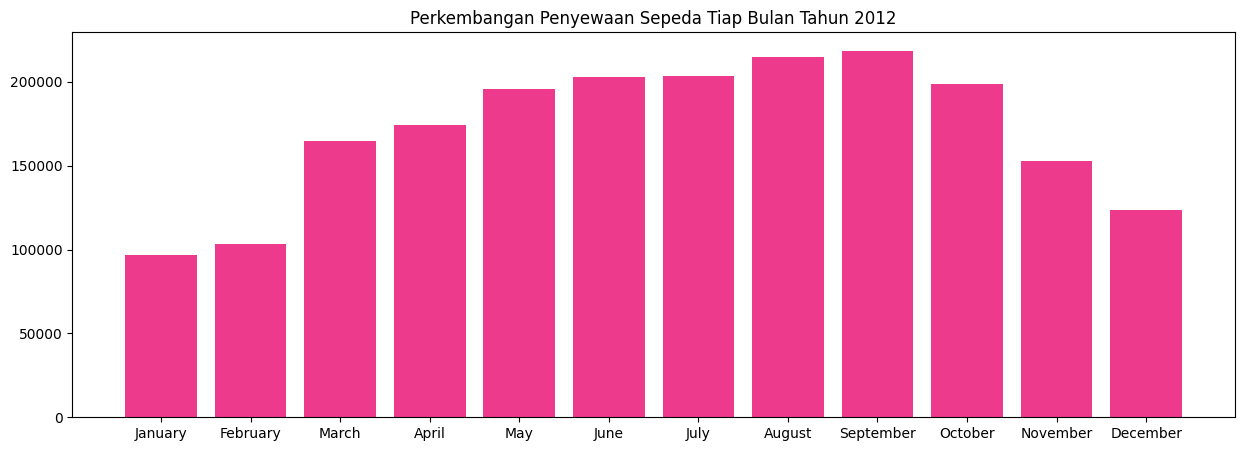

In [87]:
plt.figure(figsize=(15,5))
plt.bar(vis_2012['month'], vis_2012['count'], color="#ee3a8c")
plt.title("Perkembangan Penyewaan Sepeda Tiap Bulan Tahun 2012")
plt.show()

### Pertanyaan 2: Bagaimana dampak cuaca terhadap peminjaman sepeda selama 2 tahun?

In [88]:
data_cuaca = day_df[["weathersit", "count"]]
vis_cuaca = pd.DataFrame()
list_cuaca = []
list_count2 = []

for nama_cuaca in day_df['weathersit'].unique():
  list_cuaca.append(nama_cuaca)
  list_count2.append(data_cuaca.loc[data_cuaca['weathersit'] == nama_cuaca, 'count'].sum())

d1 = {"weathersit": list_cuaca,
      "count": list_count2}

kolom_cuaca = pd.Series(list_cuaca)
kolom_count2 = pd.Series(list_count2)
vis_cuaca = pd.concat([kolom_cuaca, kolom_count2], axis=1, ignore_index=True)
vis_cuaca.rename(columns={0: 'weather', 1: 'count'}, inplace=True)
vis_cuaca.sort_values(by='count', inplace=True, ignore_index=True)
vis_cuaca

,weather,count
0,Light Snow,37869
1,Mist,996858
2,Clear,2257952


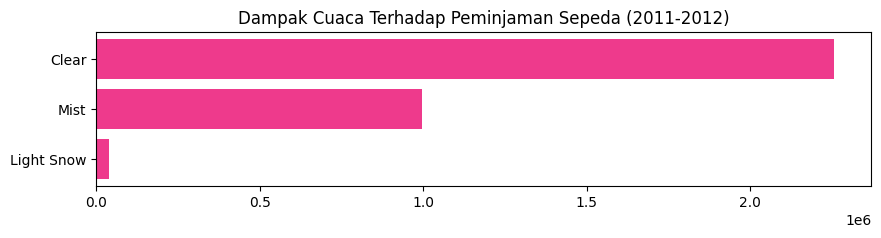

In [89]:
plt.figure(figsize=(10,2))
plt.barh(vis_cuaca['weather'], vis_cuaca['count'], color="#ee3a8c")
plt.title("Dampak Cuaca Terhadap Peminjaman Sepeda (2011-2012)")
plt.show()

## Conclusion

- Conclusion pertanyaan 1: Bagaimana perbandingan pola peminjaman sepeda setiap bulannya dalam jangka waktu 2 tahun?
Berdasarkan perbandingan visualisasi data sebelumnya, pola peminjaman sepeda pada tahun 2011 dan tahun 2012 memiliki persamaan yaitu sama-sama mengalami peningkatan pada bulan Juni, Juli dan Agustus. Lalu peminjaman sepeda terbanyak terjadi pada bulan September tahun 2012 yaitu mencapai 218573 peminjam.

- Conclusion pertanyaan 2: Bagaimana dampak cuaca terhadap peminjaman sepeda dalam jangka waktu 2 tahun?
Peminjaman sepeda dalam jangka waktu 2 tahun mayoritas terjadi ketika cuaca sedang cerah, disusul dengan cuaca berkabut kemudian bersalju ringan. Peminjaman sepeda tidak ada ketika cuaca sedang hujan deras.

In [90]:
vis_2011.to_csv()
vis_2012.to_csv()
vis_cuaca.to_csv()

',weather,count\n0,Light Snow,37869\n1,Mist,996858\n2,Clear,2257952\n'